<a href="https://colab.research.google.com/github/anuj0456/deep_learning_for_coders/blob/master/fastai/fastai_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==2.2.5

     |████████████████████████████████| 194kB 20.5MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


# Lesson 1


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision.all import *
from fastai.metrics import error_rate

In [ ]:
bs=64

In [ ]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=<function file_extract at 0x7ff908ba6a60>, timeout=4)
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz or unzip to folder `dest`.



In [ ]:
path = untar_data(URLs.PETS);path

Path('/root/.fastai/data/oxford-iiit-pet')

In [ ]:
img_path = path/'images'
anno_path = path/'annotations'

In [ ]:
fname = get_image_files(img_path)
fname[:5]

(#5) [Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_193.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_87.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_50.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_110.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_117.jpg')]

In [ ]:
pat = r'^(.*)_\d+.jpg'

In [ ]:
data = ImageDataLoaders.from_name_re(img_path, fname, pat, item_tfms=Resize(224))

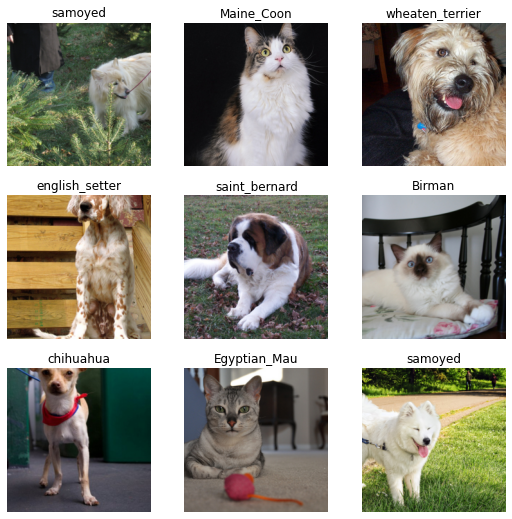

In [ ]:
data.show_batch()

In [ ]:
print(data.vocab)
len(data.vocab),data.c

## Training: resnet34

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.929597,0.351825,0.113667,00:46
1,0.674681,0.243903,0.081191,00:47
2,0.394753,0.244918,0.079161,00:47
3,0.275940,0.237717,0.077808,00:47


In [ ]:
learn.save('stage-1')

Path('/root/.fastai/data/oxford-iiit-pet/images/models/stage-1.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

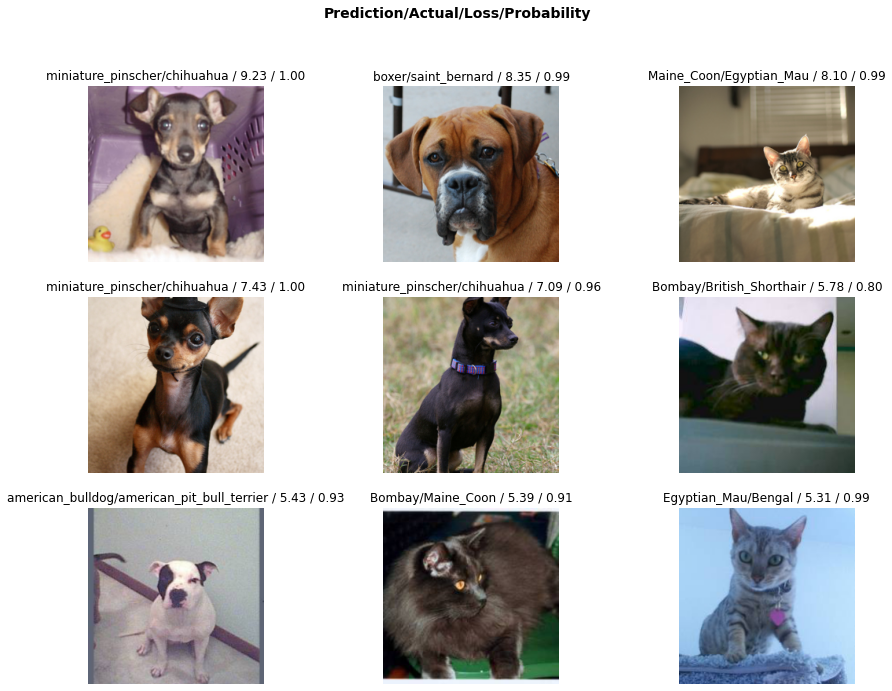

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

Interpretation.plot_top_losses(k, largest=True, **kwargs)
None

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


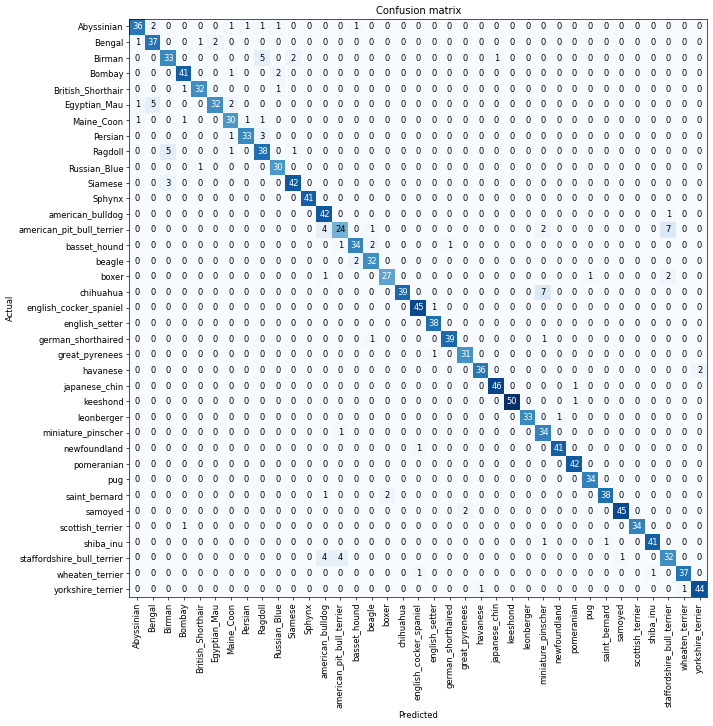

In [ ]:
doc(interp.plot_top_losses)

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('chihuahua', 'miniature_pinscher', 7),
 ('Birman', 'Ragdoll', 5),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Persian', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Siamese', 2),
 ('Bombay', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Maine_Coon', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('saint_bernard', 'boxer', 2),
 ('samoyed', 'great_pyrenees', 2)]

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.214228,0.650972,0.202977,00:51


In [ ]:
learn.load('stage-1')

SuggestedLRs(lr_min=2.2908675418875645e-07, lr_steep=7.585775847473997e-07)

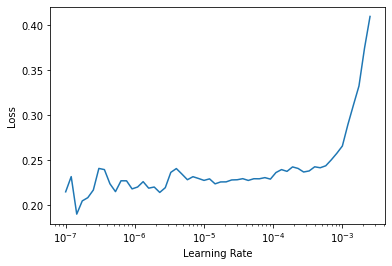

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.287724,0.249456,0.078484,00:50
1,0.189131,0.225828,0.070365,00:50


## Training: resnet50

In [ ]:
data = ImageDataLoaders.from_name_re(img_path, fname, pat,  item_tfms=Resize(299), bs=bs//2)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.0030199517495930195)

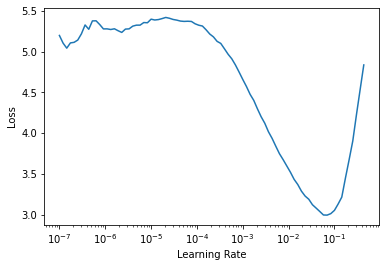

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.933272,0.244910,0.076455,02:00
1,0.467674,0.211200,0.064276,01:58
2,0.319846,0.195691,0.060893,01:58
3,0.249450,0.197149,0.062923,01:58
4,0.168355,0.169183,0.055480,01:58
5,0.119973,0.180661,0.053451,01:58
6,0.070390,0.162513,0.050744,01:58
7,0.065684,0.166025,0.050744,01:58


In [ ]:
learn.save('stage-1-50')

Path('/root/.fastai/data/oxford-iiit-pet/images/models/stage-1-50.pth')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.057794,0.176906,0.052774,02:34
1,0.055592,0.174349,0.052774,02:31
2,0.039875,0.167662,0.048038,02:31


In [ ]:
learn.load('stage-1-50')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Maine_Coon', 'Ragdoll', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Siamese', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Siamese', 'Birman', 2),
 ('beagle', 'basset_hound', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'beagle', 2)]

## Other data formats

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

Path('/root/.fastai/data/mnist_sample')

In [ ]:
tfms = aug_transforms(do_flip=False)
data = ImageDataLoaders.from_folder(path, bs_tfms=tfms)

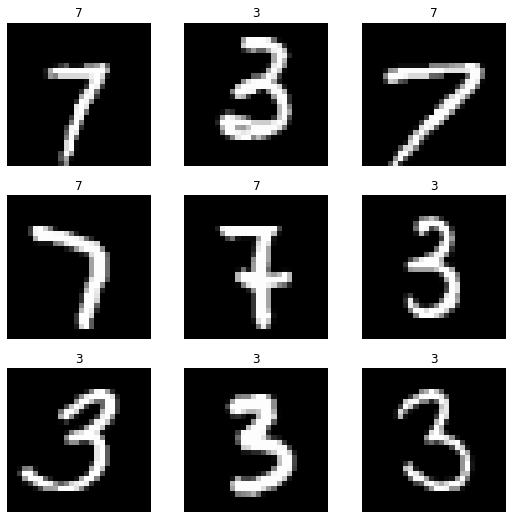

In [ ]:
data.show_batch()

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.110775,0.060839,0.981354,00:15
1,0.050426,0.037086,0.990677,00:15


In [ ]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [ ]:
data = ImageDataLoaders.from_csv(path, bs_tfms=tfms)

In [ ]:
data.vocab

['3', '7']

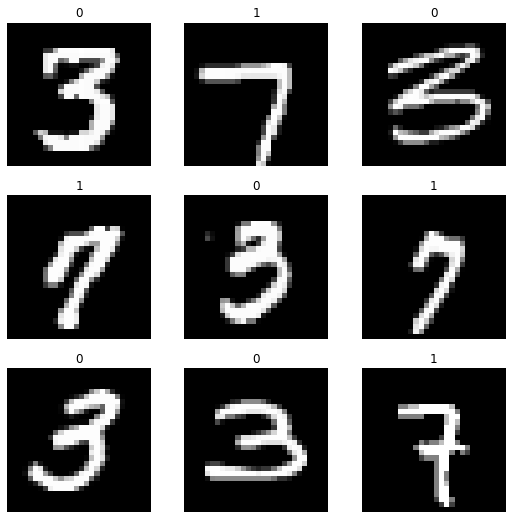

In [ ]:
data.show_batch()

In [ ]:
data = ImageDataLoaders.from_df(df,path,bs_tfms=tfms)

In [ ]:
data.vocab

['3', '7']

In [ ]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[Path('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 Path('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [ ]:
pat = r"/(\d)/\d/\d+\.png"
data = ImageDataLoaders.from_name_re(path, fn_paths, pat=pat, bs_tfms=tfms, item_tfms=Resize(24))
data.vocab

In [ ]:
data = ImageDataLoaders.from_name_func(path, fn_paths, bs_tfms=tfms, label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.vocab

['7']

In [ ]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [ ]:
data = ImageDataLoaders.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.vocab

['3', '7']